In [27]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


In [66]:
def prob1(alpha, beta, eps, N, x):
    """
    Solve equation (1.4).
    Parameters:
        alpha (float): left boundary condition
        beta (float): right boundary condition
        eps (float): coefficient for y''
        N (int): number of grid points
        x (ndarray): domain 
    Returns:
        K: solution to equation (1.5)
    """
    phi = np.zeros(N + 1) # Initialize array for phi
    phi[0], phi[-1] = alpha, beta # Update the end points 
    for ii in range(1, N): # Update the inner points 
        phi[ii] = -0.5*(x[ii] - x[ii - 1] + x[ii + 1] - x[ii])
        
    # Create the three diagonals for A
    main_d = [1 if ii == 0 or ii == N else -eps/(x[ii] - x[ii - 1]) - eps/(x[ii + 1] - x[ii]) for ii in range(N + 1)]
    above = [0] + [0 if ii == 1 else eps/(x[ii] - x[ii - 1]) - 0.5 for ii in range(1, N+1)]
    below = [eps/(x[ii + 1] - x[ii]) + 0.5 if ii != N-1 else 0 for ii in range(N)] + [0]
    
    # Solve for K using solve_banded()
    ab = np.array([above, main_d, below])
    
    K = linalg.solve_banded((1, 1), ab, phi)

    return K

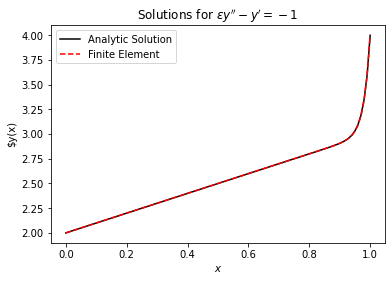

In [67]:
alpha, beta, eps, x0, x1 = 2, 4, 0.02, 0, 1 # Initialize some values 
N = 100 # Grid points 
x = np.linspace(x0, x1, N + 1) # Domain

y_hat = prob1(alpha, beta, eps, N, x) # Get the approximate solution

# Get the analytic solution
analytic_solution = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/eps) - 1)/(np.exp(1/eps) - 1))
analytic_solution = np.vectorize(analytic_solution)

# Generate plots
plt.plot(x, analytic_solution(x), color = "black", label = "Analytic Solution")
plt.plot(x, y_hat, "--", color = "red", label = "Finite Element")
plt.xlabel("$x$")
plt.ylabel("$y(x)")
plt.title("Solutions for $\epsilon y'' - y' = -1$")
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

In [68]:
def prob2():
    """
    Generates the plots for problem 2.
    """
    alpha, beta, eps, x0, x1 = 2, 4, 0.02, 0, 1 # Initialize some values 
    N = 100 # Grid points 
    x = np.linspace(x0, x1, N + 1) # Domain
    even_grid = np.linspace(0,1,15) # Get the even and clustered grids 
    clustered_grid = np.linspace(0,1,15)**(1./8)
    
    y_hat_even = prob1(alpha, beta, eps, 14, even_grid) # Solve the even grid 
    y_hat_clustered = prob1(alpha, beta, eps, 14, clustered_grid) # Solve the clustered grid 
    
    # Get the analytic solution
    analytic_solution = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/eps) - 1)/(np.exp(1/eps) - 1))
    analytic_solution = np.vectorize(analytic_solution)
    
    # Generate plots 
    plt.plot(x, analytic_solution(x), color = "black", label = "Analytic Solution")
    plt.plot(even_grid, y_hat_even, "--o", color = "blue", label = "Even Grid")
    plt.plot(clustered_grid, y_hat_clustered, "--o", color = "red", label = "Clustered Grid")
    plt.xlabel("$x$")
    plt.ylabel("$y(x)")
    plt.title("Different Grids for $\epsilon y'' - y' = -1$")
    plt.legend()
    plt.show()

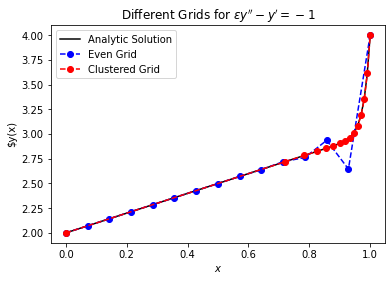

In [69]:
prob2()

# Problem 3

Solve (1.5) with the finite element method using N = 2^i finite elements, i = 4, 5, . . . , 21.

Use a log-log plot to graph the error.

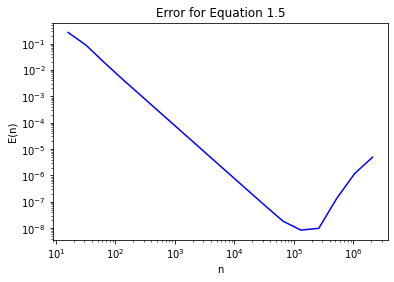

In [60]:
Ns = [2**i for i in range(4, 22)] # Get N values 
alpha, beta, eps, x0, x1 = 2, 4, 0.02, 0, 1 # Initialize some values 
errors = [] # List for tracking errors 

analytic_solution = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/eps) - 1)/(np.exp(1/eps) - 1))
analytic_solution = np.vectorize(analytic_solution)

for N in Ns:
    x = np.linspace(x0, x1, N + 1)
    y_hat = prob1(alpha, beta, eps, N, x)
    exact_sol = analytic_solution(x)
    err = np.linalg.norm(y_hat - exact_sol, ord = np.inf)
    errors.append(err)
    
plt.loglog(Ns, errors, color = "blue")
plt.ylabel("E(n)")
plt.xlabel("n")
plt.title("Error for Equation 1.5")
plt.show()